In [1362]:
# Import libraries

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline

# Introduction

The objective of this Capstone project is to produce an in-depth PCA report of the US arrest data. This project will explore the dataset, utilise pre-processing steps,and interpret the outcome of analyses. Additionally, two clustering techniques will be applied and an analysis undertaken to explain the results. 


# Data Exploration - Data Cleaning/Pre-Processing 

In [1363]:
# Read the US arrest file
arrest_df = pd.read_csv(r'C:\Users\naomi\Dropbox\NB22100004467\3 - Machine Learning\L3T12\UsArrests.csv')
arrest_df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.200,236,58,21.200
1,Alaska,10.000,263,48,44.500
2,Arizona,8.100,294,80,31.000
3,Arkansas,8.800,190,50,19.500
4,California,9.000,276,91,40.600


'This data set contains statistics, in arrests per 100,000 residents, for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.'

Kaggle.2019.USArrest.https://www.kaggle.com/datasets/kurohana/usarrets


In [1364]:
# Information regarding the dataset
arrest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


This dataset contains 5 columns (City, Murder , Assault, Urbanpop and Rape), there are 50 entries (or cities) in total. The datatypes consist of object, float64 and int64.

In [1365]:
# Dataset shape
arrest_df.shape

(50, 5)

In [1366]:
# Change the datatype of 'assault' and 'urbanpop' to float 64 
#arrest_df["Assault"] = arrest_df["Assault"].astype("float64")
#arrest_df["UrbanPop"] = arrest_df["UrbanPop"].astype("float64")

The Assault and Urbanpop columns have been changed to floats to make interpreting the data easier. 

pandas.2023.pandas.DataFrame.astype.https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

In [1367]:
# Describe the statistical information
arrest_df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000,50.000,50.000,50.000
mean,7.788,170.760,65.540,21.232
std,4.356,83.338,14.475,9.366
min,0.800,45.000,32.000,7.300
25%,4.075,109.000,54.500,15.075
50%,7.250,159.000,66.000,20.100
75%,11.250,249.000,77.750,26.175
max,17.400,337.000,91.000,46.000


The mean of the 'Assault' data (170.76) is significantly higher than the other features which already suggests it is a strong influence on the dataset. The ' UrbanPop' column also has a high mean (65.54), however as this data is represented as percentages, scaling the data will be utilised to produce more proportionate results.

In [1368]:
# Drop any duplicates from the dataset
arrest_df.drop_duplicates()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.200,236,58,21.200
1,Alaska,10.000,263,48,44.500
2,Arizona,8.100,294,80,31.000
3,Arkansas,8.800,190,50,19.500
4,California,9.000,276,91,40.600
5,Colorado,7.900,204,78,38.700
6,Connecticut,3.300,110,77,11.100
7,Delaware,5.900,238,72,15.800
8,Florida,15.400,335,80,31.900
9,Georgia,17.400,211,60,25.800


There were no duplicate rows in this dataset.

pandas.2023.pandas.DataFrame.drop_duplicates.https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

In [1369]:
# Checking if there is any missing data in the dataset
arrest_df.isnull().sum()

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

There is no missing data in this dataset.

pandas.2023.pandas.isnull.https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html

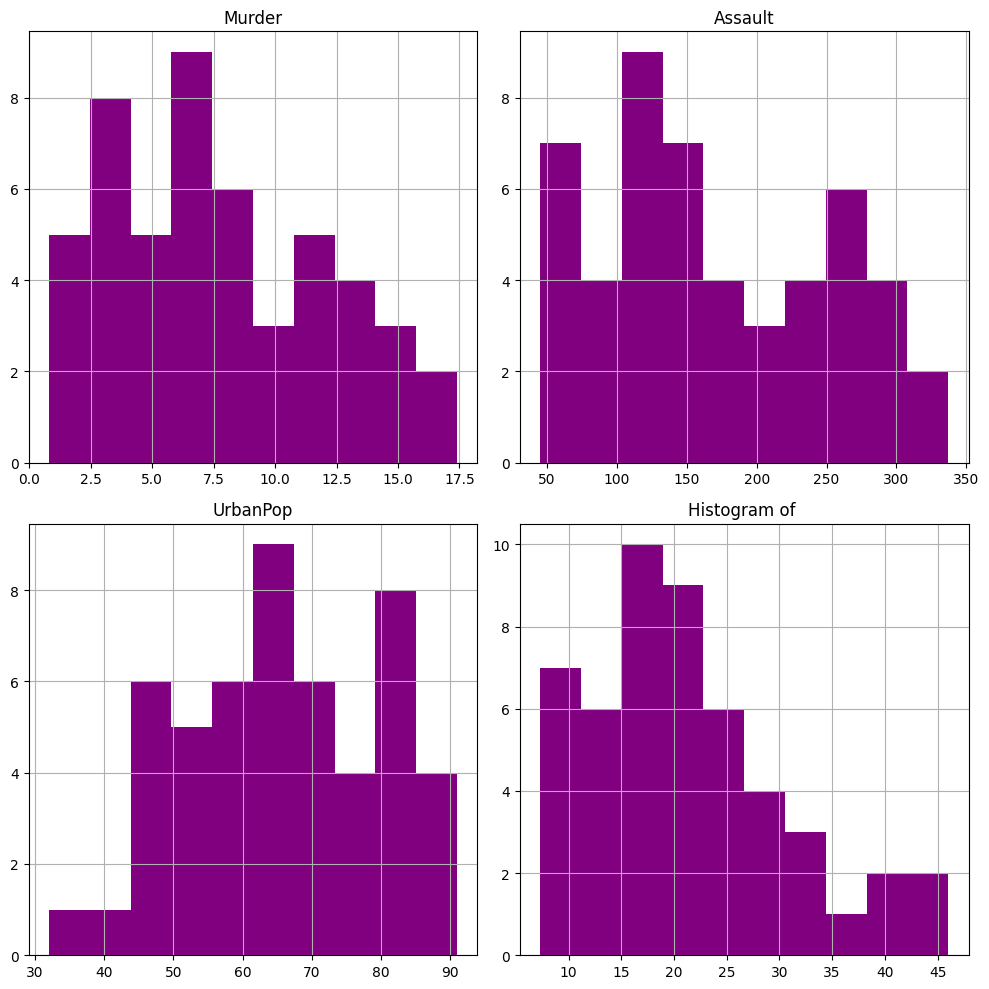

In [1370]:
# Histograms of the numeric columns 
arrest_df.hist(color='purple', grid=True, figsize=(10, 10))
plt.title("Histogram of ")
plt.tight_layout()
plt.show()


The histograms above displays the distribution of the 'Murder','Assault','UrbanPop' and 'Rape' columns. We can see that the 'Murder' and 'Assault' data is more skewed to the right than their counterparts.

HyperionDev.2021.Unsupervised learning - PCA and clustering example notebook.C:\Users\naomi\Dropbox\NB22100004467\3 - Machine Learning\L3T12\L3T12_example_plots.ipynb
HyperionDev.2021.Capstone Project II.file:///C:/Users/naomi/Dropbox/NB22100004467/3%20-%20Machine%20Learning/L3T12/DS%20L3T12%20-%20Capstone%20Project%20II%20_%20Unsupervised%20Machine%20Learning.pdf

# Correlation Analysis

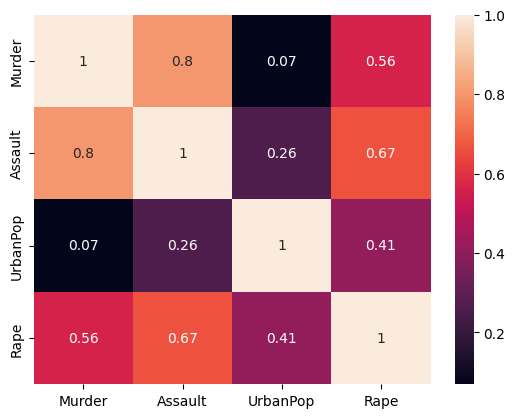

In [1371]:
# Correlation matrix of the numeric columns
cities = arrest_df['City']
correlation_df = arrest_df.drop(["City"],axis=1).corr()
labels = correlation_df.columns

# Create heatmap from correlations
sns.heatmap(correlation_df,annot=True)
plt.show()

The correlation matrix includes the data from all numeric columns. From the matrix, we can see that assault, murder, and rape have a strong postive correlation. Moreover, urban population seems to have weaker correlation with the other features, aside from rape, however this variable is represented as percentages and will therefore be investigated further for the accuracy of this PCA report. 

HyperionDev.2021.Unsupervised learning - PCA and clustering example notebook.C:\Users\naomi\Dropbox\NB22100004467\3 - Machine Learning\L3T12\L3T12_example_plots.ipynb
pandas.2023.pandas.DataFrame.corr.https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
Seaborn.2012-2022.seaborn.heatmap.https://seaborn.pydata.org/generated/seaborn.heatmap.html

# PCA Component 

In [1372]:
# Use the PCA function to begin removing non-essential parts of the data
# Store the trasformed data into a variable called X_arrest
# Display the results

np.set_printoptions(precision=2)

X = arrest_df.drop(["City"],axis=1)
pca = PCA()
X_arrest = pca.fit_transform(X)
arrest_pca = pd.DataFrame(X_arrest)
arrest_pca.head()

,0,1,2,3
0,64.802,11.448,-2.495,2.408
1,92.827,17.983,20.127,-4.094
2,124.068,-8.830,-1.687,-4.354
3,18.340,16.704,0.210,-0.521
4,107.423,-22.520,6.746,-2.812


We begin the Principal Component Analysis (PCA) by transforming and fitting the original data using the PCA function. This report will determine the principal components which can be used to differentiate the direction the data points are most spread out. 

HyperionDev.2021.Unsupervised learning - PCA and clustering example notebook.C:\Users\naomi\Dropbox\NB22100004467\3 - Machine Learning\L3T12\L3T12_example_plots.ipynb
Scikitlearn.2023.sklearn.decomposition.PCA.https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [1373]:
# Display the standard deviation of the data
std = arrest_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values}")

Standard deviation: [83.73 14.21  6.49  2.48]


The standard deviation of the dataset is calculated to determine the variability of each feature, we can see here that 'Murder' has the most variance at 83.73, followed by 'Assault' at 14.21. 

Frost,J.2023.Standard Deviation: Interpretations and Calculations.https://statisticsbyjim.com/basics/standard-deviation/
HyperionDev.2021.Unsupervised learning - PCA and clustering example notebook.C:\Users\naomi\Dropbox\NB22100004467\3 - Machine Learning\L3T12\L3T12_example_plots.ipynb

In [1374]:
# Display the explained variance of the data
arrest_variance = pca.explained_variance_ratio_
print(f"Explained Variance ratio: {arrest_variance}")

Explained Variance ratio: [9.66e-01 2.78e-02 5.80e-03 8.49e-04]


The explained variance ratio is calculated to demonstate how much information each principal component will retain. 

Builtin.2023.A Step-by-Step Explanation of Principal Component Analysis (PCA).https://builtin.com/data-science/step-step-explanation-principal-component-analysis
HyperionDev.2021.Unsupervised learning - PCA and clustering example notebook.C:\Users\naomi\Dropbox\NB22100004467\3 - Machine Learning\L3T12\L3T12_example_plots.ipynb

In [1375]:
# Display the culmulative proportion of the data
arrest_cumulative = np.cumsum(pca.explained_variance_)
print(f"Culmulative proportion:{arrest_cumulative}")

Culmulative proportion:[7011.11 7213.11 7255.22 7261.38]


The culmulative proportion is calculated to determine the amount of variance which can be explained by the principal components.

Builtin.2023.A Step-by-Step Explanation of Principal Component Analysis (PCA).https://builtin.com/data-science/step-step-explanation-principal-component-analysis
HyperionDev.2021.Unsupervised learning - PCA and clustering example notebook.C:\Users\naomi\Dropbox\NB22100004467\3 - Machine Learning\L3T12\L3T12_example_plots.ipynb

In [1376]:
# Create a biplot of the features and component scores
# Adapted from: https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = cities[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()



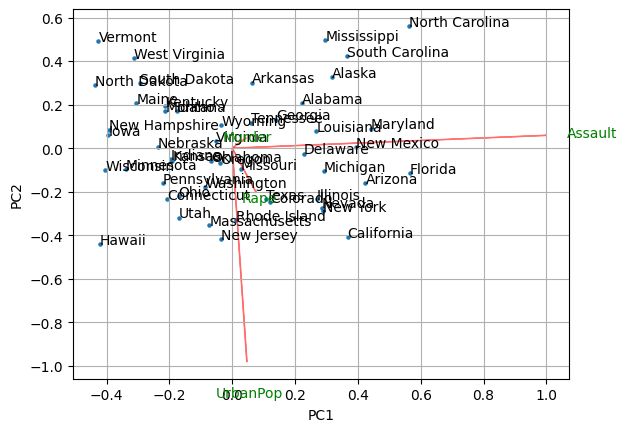

In [1377]:
# Plot the biplot 
biplot(X_arrest[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels))
plt.show()

From this biplot, we can tell that 'Assault' and 'UrbanPop' are the most important features, PC1 and PC2, as indicated by the length of their arrows. The biplot is quite hard to read as the cities are overlapping due to the dominance of 'UrbanPop', previously mentioned in the data exploration section.

HyperionDev.2021.Unsupervised learning - PCA and clustering example notebook.C:\Users\naomi\Dropbox\NB22100004467\3 - Machine Learning\L3T12\L3T12_example_plots.ipynb

In [1378]:
# Create a table displaying the most important features in the PCA components

pd.set_option('display.float_format', lambda x: '%.3f' % x) 

principal_component1 = abs( pca.components_[0] ) 
principal_component2 = abs( pca.components_[1] )

feat_table = pd.DataFrame()
feat_table["Features"] = list(labels)
feat_table["PC1 Importance"] = principal_component1
feat_table["PC2 Importance"] = principal_component2
feat_table

,Features,PC1 Importance,PC2 Importance
0,Murder,0.042,0.045
1,Assault,0.995,0.059
2,UrbanPop,0.046,0.977
3,Rape,0.075,0.201


The table above displays the importance of the features for PCA 1 and PCA 2. The results of this table shows that  'Assault' is PC1 at a weight of 0.99 and 'UrbanPop' is PC2 at a weight of 0.977. These results are also represented im the biplot. However, as mentioned earlier, the urbanpop data is presented as percentages and assault mean is much higher than than the rest of the features. In order to ensure the accurate of this PCA report, the data will be standardised and investiagted further. 

HyperionDev.2021.Unsupervised learning - PCA and clustering example notebook.C:\Users\naomi\Dropbox\NB22100004467\3 - Machine Learning\L3T12\L3T12_example_plots.ipynb

## Standardised data

In [1379]:
# Use StandardScaler to standardised the dataset 
# Use PCA function on the standardised data
std_arrest_X = StandardScaler().fit_transform(X)

std_pca = PCA()
X_std = std_pca.fit_transform(std_arrest_X)

df_std_pca = pd.DataFrame(X_std)
df_std_pca.head()

,0,1,2,3
0,0.986,1.133,-0.444,0.156
1,1.950,1.073,2.040,-0.439
2,1.763,-0.746,0.055,-0.835
3,-0.141,1.120,0.115,-0.183
4,2.524,-1.543,0.599,-0.342


In order to standardise the PCA dataset, this report has used StandardScaler and the PCA function. The results of this variable will be used to create a biplot to visualise the new data.

Scilearn.2023.sklearn.preprocessing.StandardScaler.https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [1380]:
# Create a biplot of the features and component scores
# Adapted from: https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = cities[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()


HyperionDev.2021.Unsupervised learning - PCA and clustering example notebook.C:\Users\naomi\Dropbox\NB22100004467\3 - Machine Learning\L3T12\L3T12_example_plots.ipynb

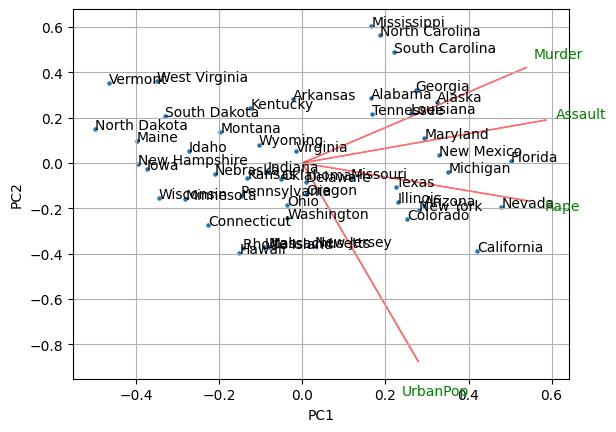

In [1381]:
# Plot the biplot of standardised data
biplot(X_std[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(labels))
plt.show()

This biplot shows that the standardised data results are not as dominated by the urbanpop and assault features, this will better explain the variance of all the features. We are also seeing the different cities clustering in different groups.

HyperionDev.2021.Unsupervised learning - PCA and clustering example notebook.C:\Users\naomi\Dropbox\NB22100004467\3 - Machine Learning\L3T12\L3T12_example_plots.ipynb

In [1382]:
# Create a table displaying the most important features in the PCA components using the standardised data

stand_pc1 = abs(std_pca.components_[0]) 
stand_pc2 = abs(std_pca.components_[1])

feat_table = pd.DataFrame()
feat_table["Features"] = list(labels)
feat_table["PC1 Importance"] = stand_pc1
feat_table["PC2 Importance"] = stand_pc2
feat_table

,Features,PC1 Importance,PC2 Importance
0,Murder,0.536,0.418
1,Assault,0.583,0.188
2,UrbanPop,0.278,0.873
3,Rape,0.543,0.167


In the table above, we can see that 'Assault' is still the highest for PC1 and 'Urbanpop' is the highest for PC2. We can also see that the weights are more evenly distributed for all the features. There are a few observations to be made for features with low importance, for example, 'Urbanpop' is relatively low in importance for PC1, and 'Assault' and 'Rape' have lower importance in PC2. 

HyperionDev.2021.Unsupervised learning - PCA and clustering example notebook.C:\Users\naomi\Dropbox\NB22100004467\3 - Machine Learning\L3T12\L3T12_example_plots.ipynb

# Feature importance and visualisations

Text(0.5, 0, 'Components')

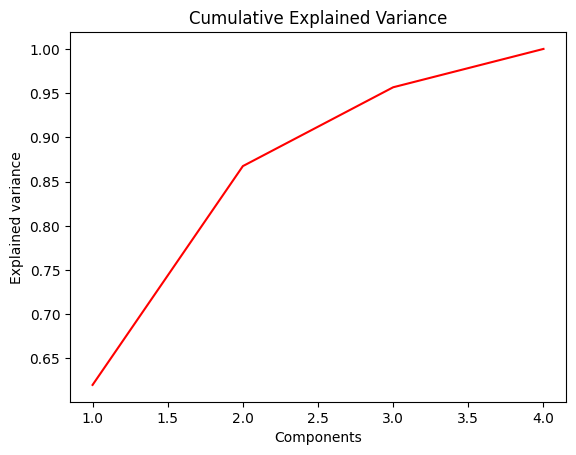

In [1383]:
# Cumulative variance plot

plt.plot(range(1,len(std_pca.explained_variance_ratio_ )+1),
         np.cumsum(std_pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")
plt.ylabel('Explained variance')
plt.xlabel('Components')


HyperionDev.2021.Unsupervised learning - PCA and clustering example notebook.C:\Users\naomi\Dropbox\NB22100004467\3 - Machine Learning\L3T12\L3T12_example_plots.ipynb

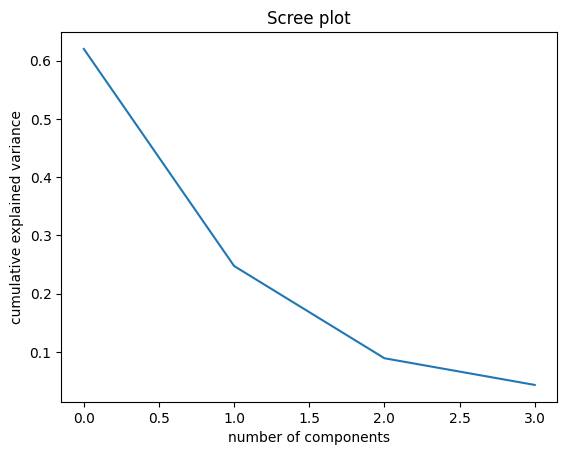

In [1384]:
plt.plot(std_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

From the explained variance graph and scree plot, we can see that the first two principal components explain over 85% of the variance. As a result of this dimensionality reduction only these two principal components will be used in the cluster analysis for this report. 

HyperionDev.2021.Unsupervised learning - PCA and clustering example notebook.C:\Users\naomi\Dropbox\NB22100004467\3 - Machine Learning\L3T12\L3T12_example_plots.ipynb

In [1385]:
# Create a dataframe of the standardised data of the 2 principal components
pca_df = pd.DataFrame(X_std[:,0:2], index = df_std_pca.index)
pca_df.head()

,0,1
0,0.986,1.133
1,1.950,1.073
2,1.763,-0.746
3,-0.141,1.120
4,2.524,-1.543


The pca_df only displays the first 2 principal components and their associated values. 

HyperionDev.2021.Unsupervised learning - PCA and clustering example notebook.C:\Users\naomi\Dropbox\NB22100004467\3 - Machine Learning\L3T12\L3T12_example_plots.ipynb

# Clustering Techniques and Cluster Analysis

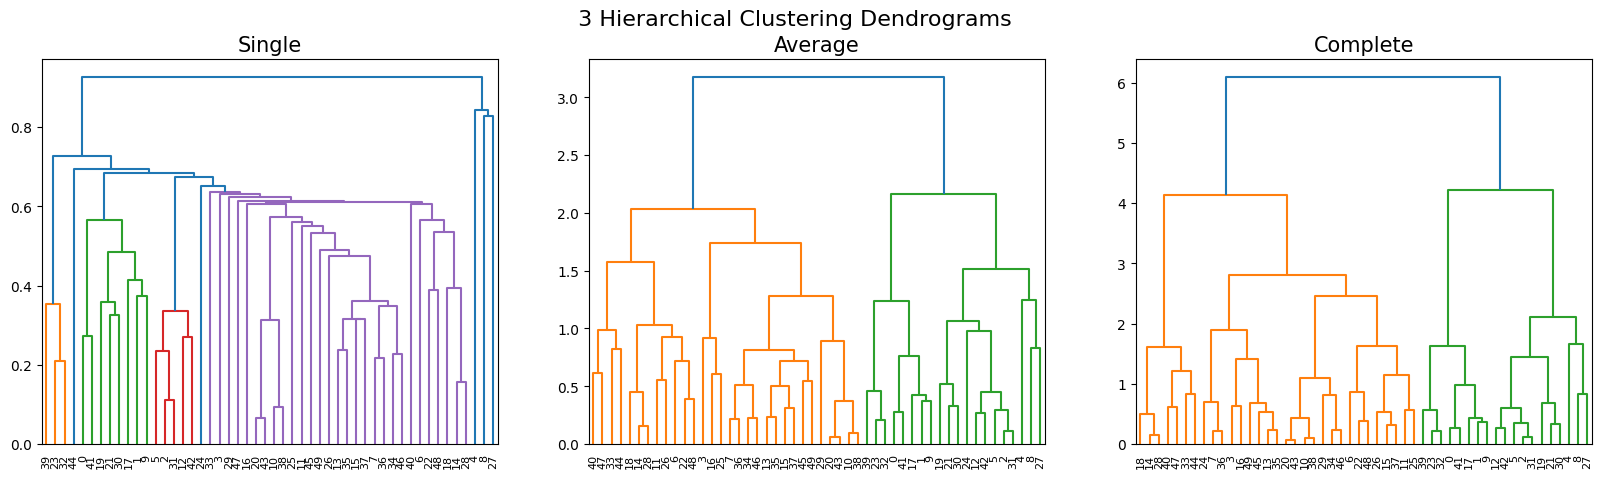

In [1386]:
# Use Hierarchical Clustering on pca_df
arrest_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
arrest_model =arrest_model.fit(pca_df)

# Display the 3 different dendograms of various linkages (single,average,complete)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle(' 3 Hierarchical Clustering Dendrograms', fontsize=16)
ax1.set_title("Single",fontsize=15)
dendrogram(linkage(pca_df, method='single'), labels=pca_df.index, ax=ax1) 
ax2.set_title("Average", fontsize=15)
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index, ax=ax2)
ax3.set_title("Complete", fontsize=15)
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index, ax=ax3)

plt.show()

The first clustering technique used in this PCA report is hierarchical clustering. As shown in the dendograms above, 3 seperate linkages were used. The single linkage was used to illustated the smallest dissimlarity between diiferent clusters, the average linkage is used to illustate the average dissimilarity between clusters and the complete linkage which illustrates the largest dissimilarity between clusters. For this PCA report, the complete method has proven to be the most suitable as this dendogram gives a clearer idea of where the distances between the clusters are greatest. Due to the evidence of clustering in the biplot and the complete dendogram, the number of clusters to be used for further analysis will be 3.


HyperionDev.2021. Clustering II.file:///C:/Users/naomi/Dropbox/NB22100004467/3%20-%20Machine%20Learning/L3T09/DS%20L3T09%20-%20Unsupervised%20Learning%20II_%20Clustering%20II.pdf
HyperionDev.2021.Unsupervised learning - PCA and clustering example notebook.C:\Users\naomi\Dropbox\NB22100004467\3 - Machine Learning\L3T12\L3T12_example_plots.ipynb
Jordaan.L.2022.PCA - USArrests data set analysis.https://github.com/lu-sketch/USArrests-data-set/blob/main/USArrests%20-%20L%20Jordaan.ipynb
Sciekitlearn.2023.sklearn.cluster.AgglomerativeClustering.https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

Text(0, 0.5, 'Principal Component 1')

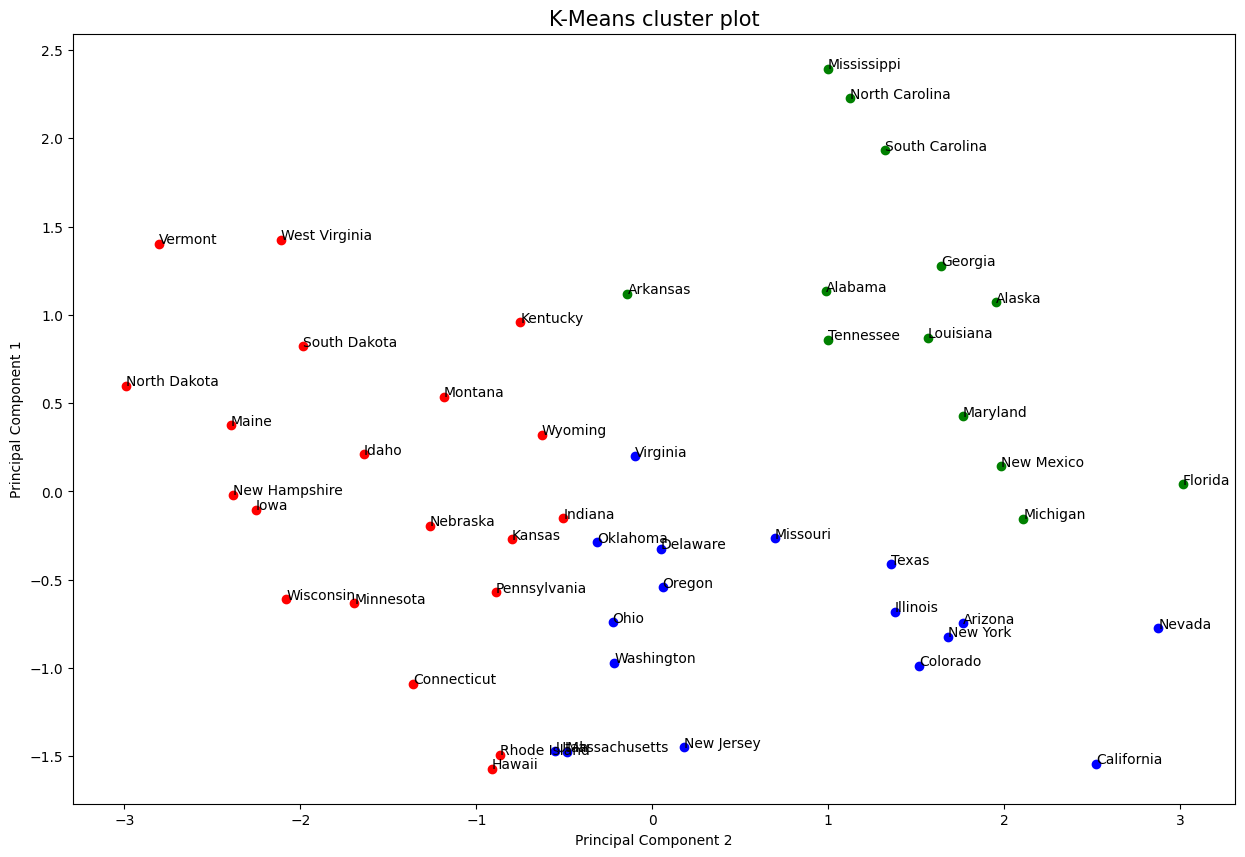

In [1387]:
# Create a cluster plot using kmeans
# Use first two principal components
# cluster number = 3 

x= X_std[:,0]
y = X_std[:,1]


kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_


fig, ax = plt.subplots(figsize=(15,10))
colours = 'rbgy'
for i in range(0,3):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = cities[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot", fontsize=(15))
ax.set_xlabel("Principal Component 2")
ax.set_ylabel("Principal Component 1")

The cluster plot above uses the first two principal components from the standardised data and a n_number of 3. From this plot, we can see 3 distinct groups of cities illustated by various colours. The blue cities and green cities appear to be more violent has they are placed higher on the graph for assault and murder. The red cities are much safer as they are ranked lower on the both principal components meaning there was less recorded crime.

HyperionDev.2021.Unsupervised learning - PCA and clustering example notebook.C:\Users\naomi\Dropbox\NB22100004467\3 - Machine Learning\L3T12\L3T12_example_plots.ipynb
Jordaan.L.2022.PCA - USArrests data set analysis.https://github.com/lu-sketch/USArrests-data-set/blob/main/USArrests%20-%20L%20Jordaan.ipynb
Scikitlearn.2023.sklearn.cluster.KMeans.https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [1388]:
# Create a new column for the cluster id of each city
cluster_labels = kmeans.fit_predict(pca_df)
arrest_df['Cluster ID'] = cluster_labels    
arrest_df.head(50)



,City,Murder,Assault,UrbanPop,Rape,Cluster ID
0,Alabama,13.200,236,58,21.200,2
1,Alaska,10.000,263,48,44.500,2
2,Arizona,8.100,294,80,31.000,1
3,Arkansas,8.800,190,50,19.500,2
4,California,9.000,276,91,40.600,1
5,Colorado,7.900,204,78,38.700,1
6,Connecticut,3.300,110,77,11.100,0
7,Delaware,5.900,238,72,15.800,1
8,Florida,15.400,335,80,31.900,2
9,Georgia,17.400,211,60,25.800,2


Finally, the code above allows us to see the cluster number, and severity of crime, associated with a city displayed in the original dataframe.

HyperionDev.2021.Unsupervised learning - PCA and clustering example notebook.C:\Users\naomi\Dropbox\NB22100004467\3 - Machine Learning\L3T12\L3T12_example_plots.ipynb
Jordaan.L.2022.PCA - USArrests data set analysis.https://github.com/lu-sketch/USArrests-data-set/blob/main/USArrests%20-%20L%20Jordaan.ipynb